Use GA search (using pygad) to find the minimum of the real-valued function f(x) = abs(x) + cos(x). Restrict the search interval to [-20, 20]. Carefully define the fitness function since pygad can only maximize it!

$$ f(x) = |x| + cos(x) $$

In [15]:
import numpy as np
import pygad
import matplotlib.pyplot as plt

In [ ]:
def f(x):
    return np.abs(x) + np.cos(x)

In [9]:
def fitness_function(ga_instance, x, x_idx):
    return -f(x)[0]

In [22]:
ga_instance = pygad.GA(fitness_func=fitness_function,
                       num_generations=100,
                       num_parents_mating=10,
                       sol_per_pop=20,
                       gene_space = [{'low':-20, 'high':20}],
                       num_genes=1)

ga_instance.run()

In [23]:
ga_instance.best_solution()

(array([-0.0042954]), -1.004286175220547, 0)

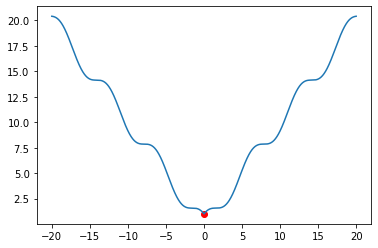

In [24]:
plt.plot(np.arange(-20, 20, 0.01), [f(x) for x in np.arange(-20, 20, 0.01)])
plt.scatter(ga_instance.best_solution()[0], -ga_instance.best_solution()[1], color="r")

Use GA search to find the minimum of the real-valued two-dimensional function f(x1, x2) = 20 + x1^2 + x2^2 - 10 * (cos(2 * pi * x1) + cos(2 * pi * x2)), where x1 and x2 are from the interval [-5.12, 5.12].

$$ f(x_1, x_2) = 20 + x_1^2 + x_2^2 - 10 (cos(2 \pi x_1) + cos(2 \pi x_2)) $$

In [79]:
def f2(x1, x2):
    return 20 + x1**2 + x2**2 - 10 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))

In [80]:
def fitness_function2(ga_instance, x, x_idx):
    return -f2(x[0], x[1])

In [81]:
ga_instance2 = pygad.GA(fitness_func=fitness_function2,
                       num_generations=100,
                       num_parents_mating=30,
                       sol_per_pop=100,
                       gene_space = {'low':-5.12, 'high':5.12},
                       num_genes=2)

ga_instance2.run()

In [82]:
ga_instance2.best_solution()

(array([0.00228976, 0.01701008]), -0.058389111367290525, 0)

We are given the following data:

substrate = [1.73, 2.06, 2.20, 4.28, 4.44, 5.53, 6.32, 6.68, 7.28, 7.90, 8.80, 9.14, 9.18, 9.40, 9.88]

Velocity  = [12.48, 13.97, 14.59, 21.25, 21.66, 21.97, 25.36, 22.93, 24.81, 25.63, 24.68, 29.04, 28.08, 27.32, 27.77]

Use GA search to fit the data to the model: Velocity = (M * Substrate) / (K + Substrate), where M and K are the model parameters. Restrict the search interval for M to [40.0, 50.0] and for K to [3.0, 5.0].

In [90]:
substrate = np.array([1.73, 2.06, 2.20, 4.28, 4.44, 5.53, 6.32, 6.68, 7.28, 7.90, 8.80, 9.14, 9.18, 9.40, 9.88])

velocity = np.array([12.48, 13.97, 14.59, 21.25, 21.66, 21.97, 25.36, 22.93, 24.81, 25.63, 24.68, 29.04, 28.08, 27.32, 27.77])


In [91]:
def model(M, K):
    return (M * substrate) / (K + substrate)

In [94]:
def fitness_function3(ga_instance, x, x_idx):
    return -np.sum(velocity - model(x[0], x[1]))**2 

In [95]:
ga_instance3 = pygad.GA(fitness_func=fitness_function3,
                       num_generations=100,
                       num_parents_mating=30,
                       sol_per_pop=200,
                       gene_space = [{'low':40.0, 'high':50.0}, {'low':3.0, 'high':5.0}],
                       num_genes=2)

ga_instance3.run()

In [97]:
ga_instance3.best_solution()

(array([41.29147012,  4.48312788]), -6.844945444324242e-05, 0)

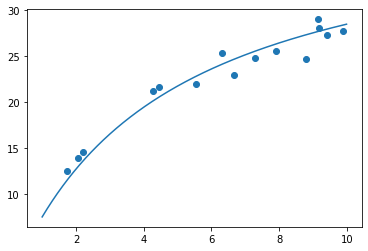

In [102]:
def model_to_print(M, K):
    points = np.arange(1, 10, 0.01)
    return (M * points) / (K + points)

plt.scatter(substrate, velocity)
plt.plot(np.arange(1, 10, 0.01), model_to_print(ga_instance3.best_solution()[0][0], ga_instance3.best_solution()[0][1]))